# House Price Prediction

### **Problem Statement**
Accurately predicting house prices is crucial for buyers, sellers, and real estate businesses to make informed decisions. House prices depend on various factors such as area, number of rooms, number of bathrooms, location, and other property features. However, manual estimation can be inaccurate and subjective.

This project aims to develop a machine learning model that can predict house prices based on these key features. By leveraging regression techniques, the model will provide data-driven price estimates, helping stakeholders make better financial and investment decisions in the real estate market.

### **Data Collection**

- Dataset Source - https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
- The data consists of 545 rows and 13 columns 

### **Data Information**

The dataset contains various features that influence house prices. Below is a brief description of each feature:

- price (Target Variable): The price of the house.
- area: Total area of the house in square feet.
- bedrooms: Number of bedrooms in the house.
- bathrooms: Number of bathrooms in the house.
- stories: Number of floors in the house.
- mainroad: Whether the house is located on the main road (Yes/No - categorical).
- guestroom: Whether the house has a guest room (Yes/No - categorical).
- basement: Whether the house has a basement (Yes/No - categorical).
- hotwaterheating: Whether the house has a hot water heating system (Yes/No - categorical).
- airconditioning: Whether the house has air conditioning (Yes/No - categorical).
- parking: Number of parking spaces available (numerical).
- prefarea: Whether the house is in a preferred locality (Yes/No - categorical).
- furnishingstatus: The furnishing status of the house (Fully Furnished/Semi-Furnished/Unfurnished - categorical).

### **Import Data and Required Packages**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [4]:
# import the csv file
df = pd.read_csv("Housing.csv")

# Read the first five rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# shape of the dataset
shape= df.shape
print(f"Shape of the dataset:",shape)

Shape of the dataset: (545, 13)


In [6]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

We have 7 categorical features : ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


- There are 545 rows and 13 columns present in the dataset

### **Checking missing values**

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


- There are no missing values present in the dataset

### **Checking duplicates**

In [8]:
# Check for duplicates present in the dataset
duplicates = df.duplicated().sum()

if duplicates==0:
    print("There are no duplicate values present in the dataset")
else:
    print("There are duplicate values present in the dataset")

There are no duplicate values present in the dataset


### **Check the number of unique rows in each column**

In [9]:
# Numarical features:
print("Unique values in price column:", df['price'].unique())
print('\n')
print("Unique values in area column:", df['area'].unique())
print('\n')
print("Unique values in bedrooms column:", df['bedrooms'].unique())
print('\n')
print("Unique values in bathrooms column:", df['bathrooms'].unique())
print('\n')
print("Unique values in stories column:", df['stories'].unique())
print('\n')
print("Unique values in parking column:", df['parking'].unique())
print('\n')
print("Unique values in price column:", df['price'].unique())
print('\n')
# Catagorical features:
print("Unique values in mainroad column:", df['mainroad'].unique())
print('\n')
print("Unique values in guestroom column:", df['guestroom'].unique())
print('\n')
print("Unique values in basement column:", df['basement'].unique())
print('\n')
print("Unique values in hotwaterheating column:", df['hotwaterheating'].unique())
print('\n')
print("Unique values in prefarea column:", df['prefarea'].unique())
print('\n')
print("Unique values in furnishingstatus column:", df['furnishingstatus'].unique())

Unique values in price column: [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  

In [10]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

- it seems like there might be a higher corrillation between price and area.
- As the price of the property depends on the area. 
- Features like mainroad, guestroom, basement, hotwaterheating, airconditioning, and prefarea are binary categorical variables (Yes/No).
- This can be converted into 0s and 1s using lable encoder
- furnishingstatus have 3 unique values.
- There are upto 6 bedrooms, 4 bathrooms, and 4 floors.

### **Check statistics of the dataset**

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


- It seems like all the mean are not close to each other
- Minimum price here is 17,50,000 and maximum price is 1,33,00,000 this indicates outliers
- Minimum area here is 1650sqft and maximum  is 16200sqft 

### **Check various categories present in the different categorical column**

In [12]:
# Lets check the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- price, area, bedrooms,bathrooms,stories,parking are intiger datatype.
- mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus are categorical datatype.
- price is the Target variable. 

### **Exploratory Data Analysis [EDA]**

### Univarient Analysis

#### 1 Histogram

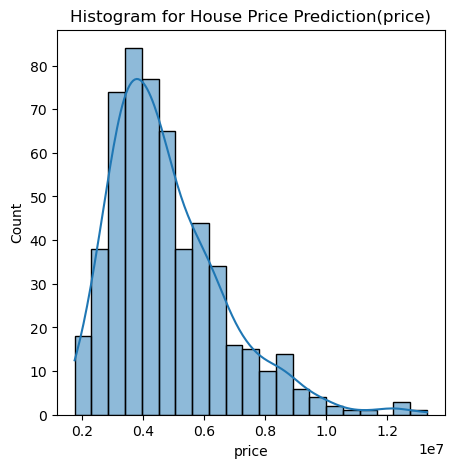

Text(0.5, 1.0, 'Histogram for House Price Prediction(parking)')

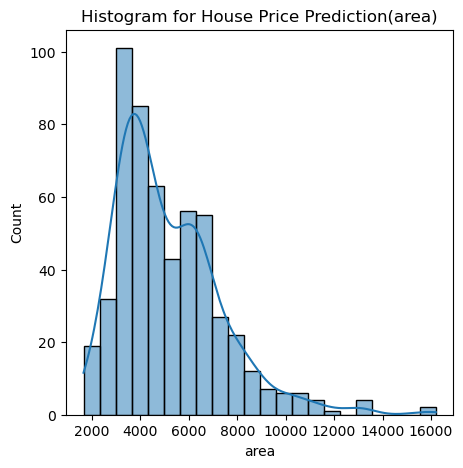

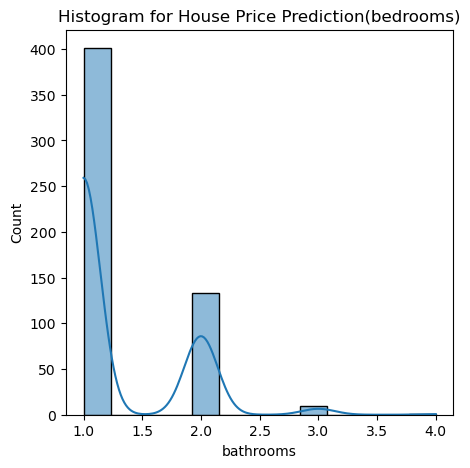

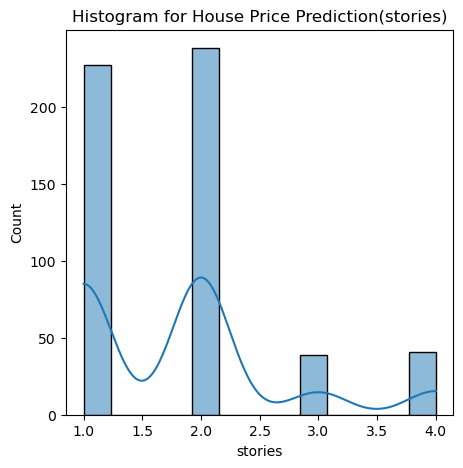

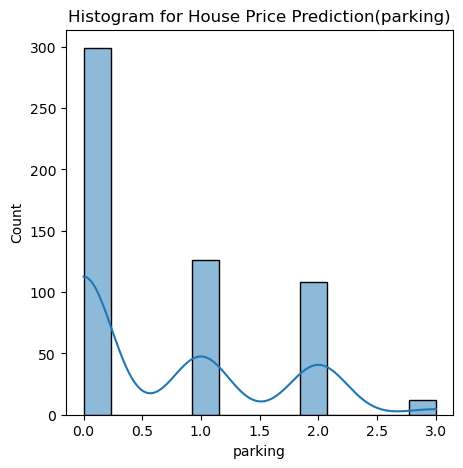

In [13]:
# price
plt.figure(figsize=(5,5))
sns.histplot(df["price"],kde=True)
plt.title("Histogram for House Price Prediction(price)")
plt.show()

# area
plt.figure(figsize=(5,5))
sns.histplot(df["area"],kde=True)
plt.title("Histogram for House Price Prediction(area)")

# bedrooms
plt.figure(figsize=(5,5))
sns.histplot(df["bathrooms"],kde=True)
plt.title("Histogram for House Price Prediction(bedrooms)")

# stories
plt.figure(figsize=(5,5))
sns.histplot(df["stories"],kde=True)
plt.title("Histogram for House Price Prediction(stories)")

# parking
plt.figure(figsize=(5,5))
sns.histplot(df["parking"],kde=True)
plt.title("Histogram for House Price Prediction(parking)")

### 2 Boxplot

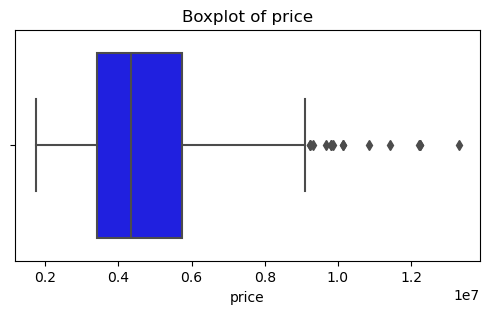

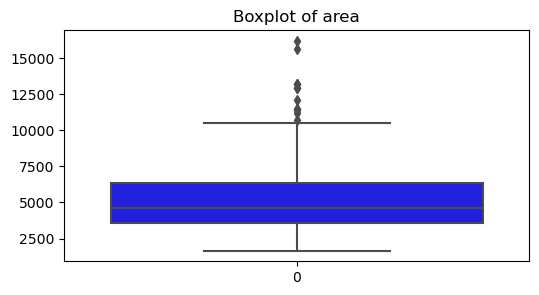

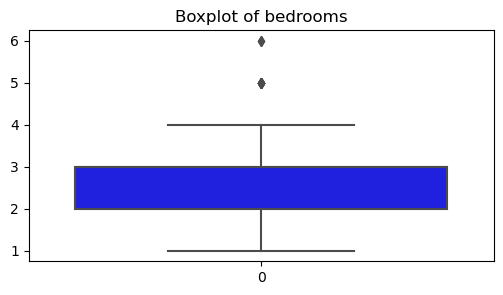

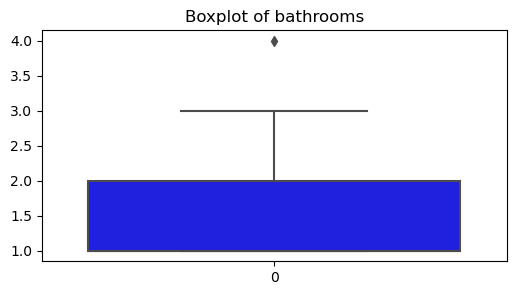

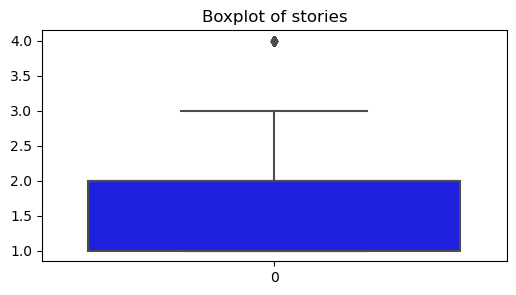

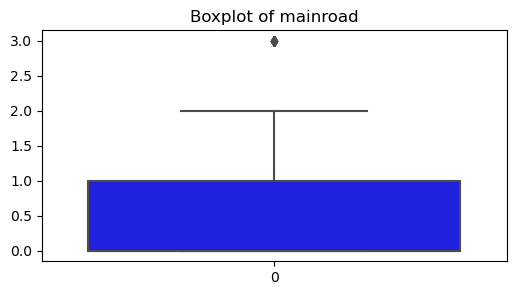

In [14]:
# Price
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["price"],color="blue")
plt.title(f'Boxplot of price')
plt.show()

# area
plt.figure(figsize=(6,3))
sns.boxplot(df["area"],color="blue")
plt.title(f"Boxplot of area")
plt.show()

# bedrooms
plt.figure(figsize=(6,3))
sns.boxplot(df["bedrooms"],color="blue")
plt.title(f"Boxplot of bedrooms")
plt.show()

# bathrooms
plt.figure(figsize=(6,3))
sns.boxplot(df["bathrooms"],color="blue")
plt.title(f"Boxplot of bathrooms")
plt.show()

# stories
plt.figure(figsize=(6,3))
sns.boxplot(df["stories"],color="blue")
plt.title(f"Boxplot of stories")
plt.show()

# parking
plt.figure(figsize=(6,3))
sns.boxplot(df["parking"],color="blue")
plt.title(f"Boxplot of mainroad")
plt.show()

Observation for Boxplot and Histogram:
- area and price  are right skewed
- let's not remove the outliers as the price of the house depends on the area (sqft) and the location where the house is situated.

### 3 Countplot    

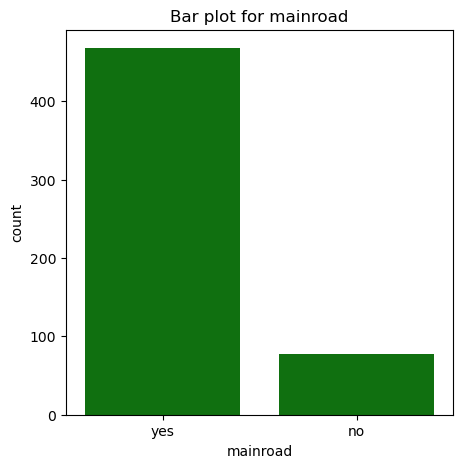

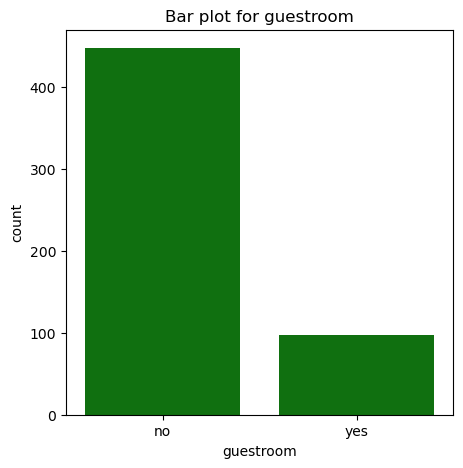

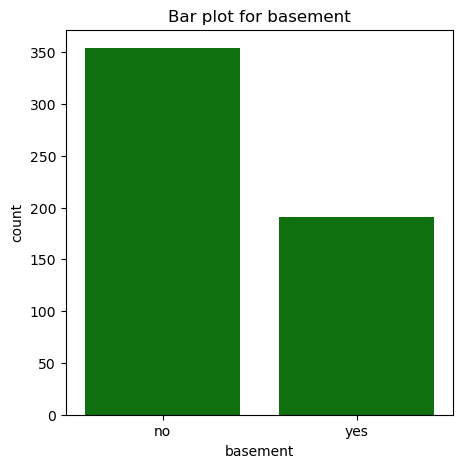

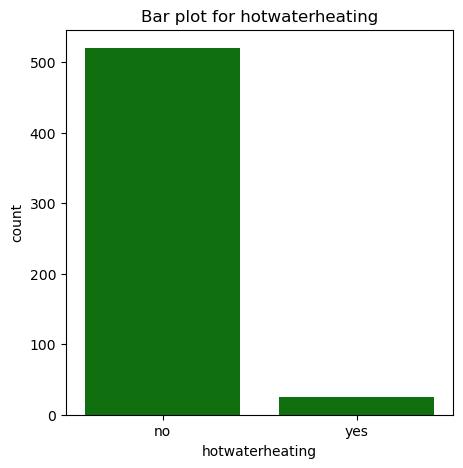

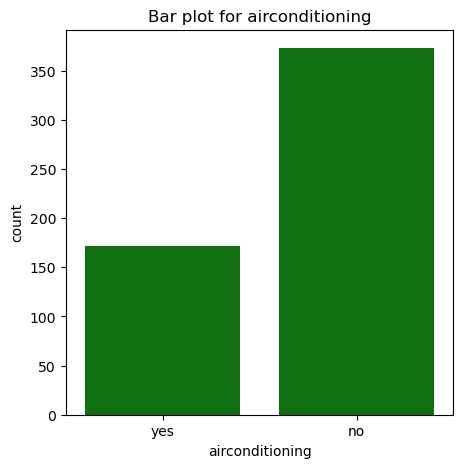

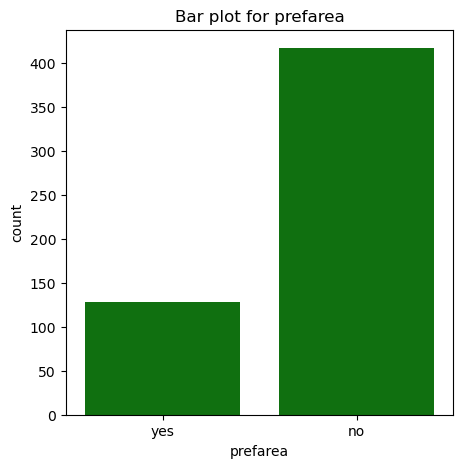

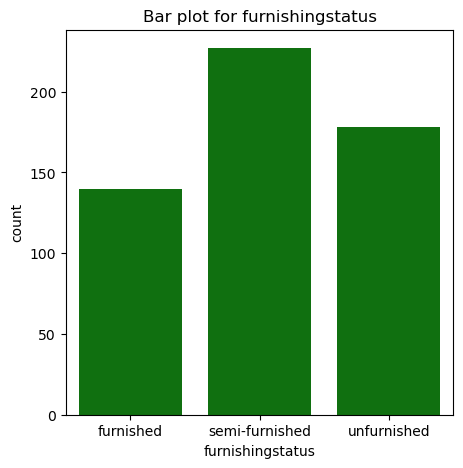

In [15]:
# mainroad
plt.figure(figsize=(5,5))
sns.countplot(x=df["mainroad"], color="green")  
plt.title("Bar plot for mainroad")
plt.show()

# guestroom
plt.figure(figsize=(5,5))
sns.countplot(x=df["guestroom"], color="green")  
plt.title("Bar plot for guestroom")
plt.show()

# basement
plt.figure(figsize=(5,5))
sns.countplot(x=df["basement"], color="green")  
plt.title("Bar plot for basement")
plt.show()

# hotwaterheating
plt.figure(figsize=(5,5))
sns.countplot(x=df["hotwaterheating"], color="green")  
plt.title("Bar plot for hotwaterheating")
plt.show()

# airconditioning
plt.figure(figsize=(5,5))
sns.countplot(x=df["airconditioning"], color="green")  
plt.title("Bar plot for airconditioning")
plt.show()

# prefarea
plt.figure(figsize=(5,5))
sns.countplot(x=df["prefarea"], color="green")  
plt.title("Bar plot for prefarea")
plt.show()

# furnishingstatus
plt.figure(figsize=(5,5))
sns.countplot(x=df["furnishingstatus"], color="green")  
plt.title("Bar plot for furnishingstatus")
plt.show()

### **Bivariate Analysis (Two Variables)**

#### 1 Scatter plot

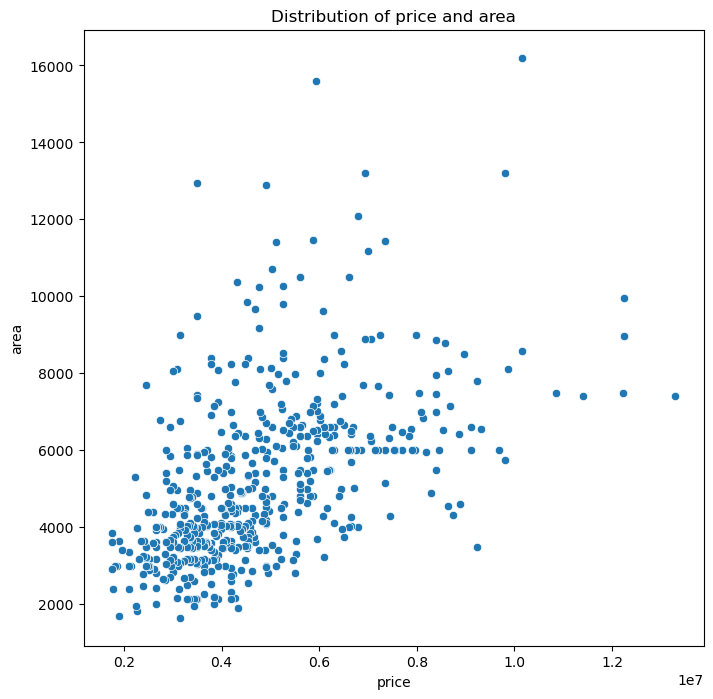

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df["price"], y=df["area"])
plt.title("Distribution of price and area")
plt.show()

- There is a higher corrilation between price and area.
- Majority of the data points lies in between 2000 and 8000.
- There are some properties with outliers but it can come under luxury property.

### **Multivariate Analysis (More than Two Variables)**
### 1 Corrilation Matrix

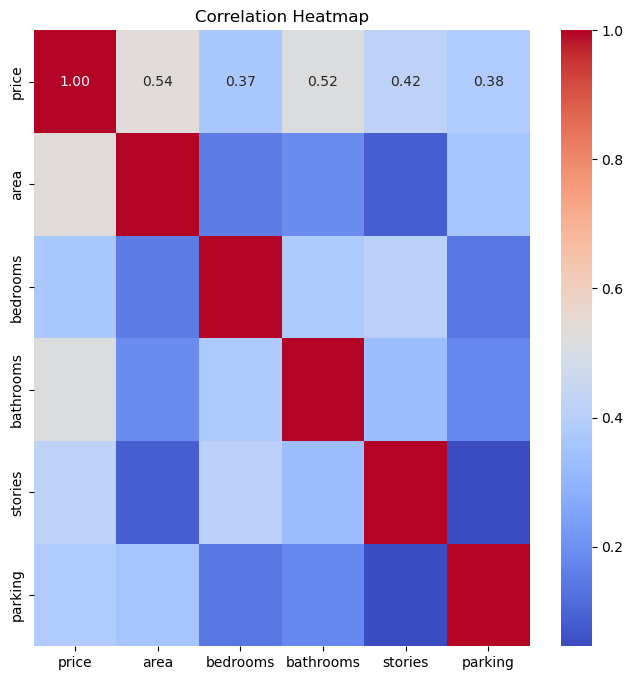

In [17]:
num_df = df.select_dtypes(include=["int64"])
plt.figure(figsize=(8,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Compute correlation matrix
plt.title("Correlation Heatmap")
plt.show()

- There is a higher corrilation between price and area(0.54)
- There is very low corrilation between stories and area(0.08)

#### 2 Pairplot

<Figure size 1200x1200 with 0 Axes>

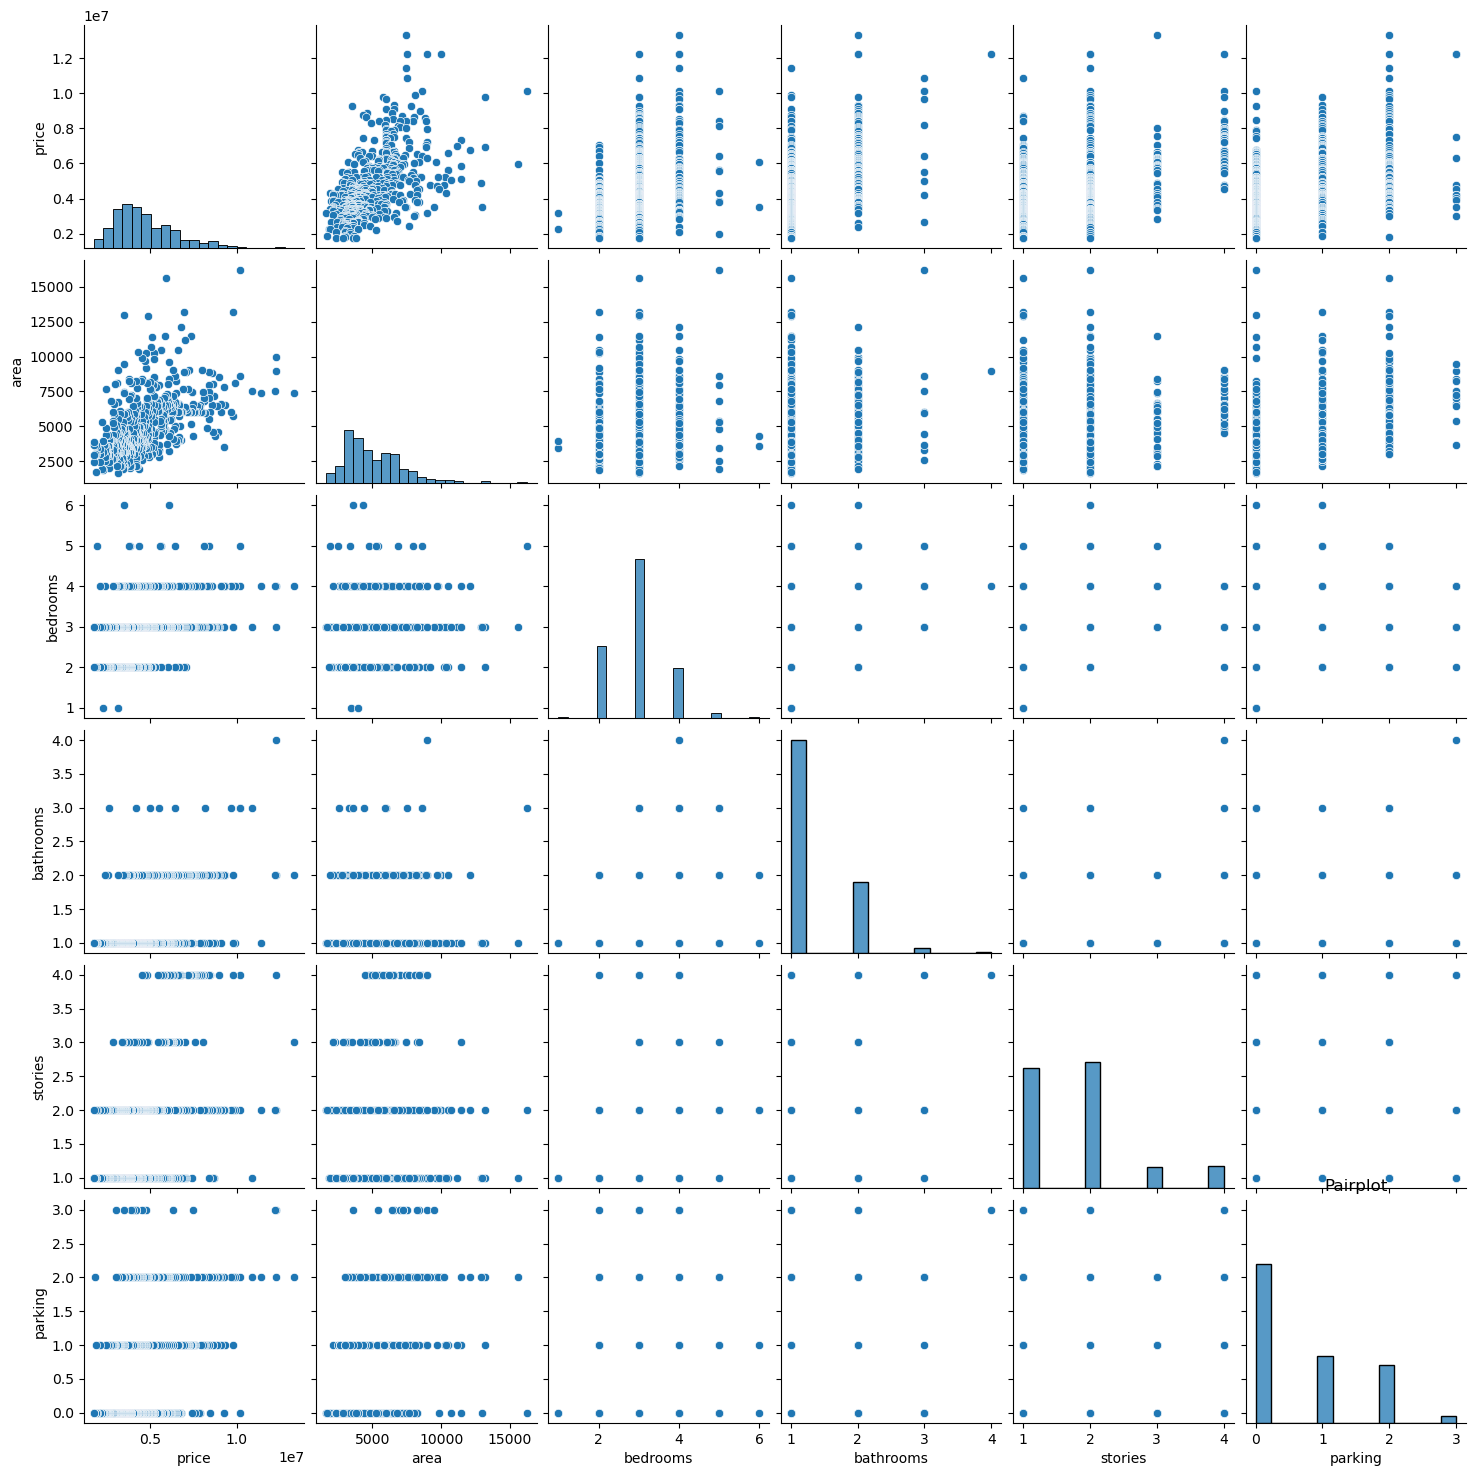

In [18]:
plt.figure(figsize=(12,12))
sns.pairplot(df, kind="scatter")
plt.title("Pairplot")
plt.show()

#### **Lets convert all the categorical features to numarical feature**

In [19]:
# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df, 
                            columns=["mainroad", "guestroom", "basement", 
                                     "hotwaterheating", "airconditioning", 
                                     "prefarea", "furnishingstatus"], 
                            drop_first=True)
# Convert boolean values to integers (0/1)
df_encoded = df_encoded.astype(int)

# Display the first few rows
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


#### Check the datatypes

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int32
 1   area                             545 non-null    int32
 2   bedrooms                         545 non-null    int32
 3   bathrooms                        545 non-null    int32
 4   stories                          545 non-null    int32
 5   parking                          545 non-null    int32
 6   mainroad_yes                     545 non-null    int32
 7   guestroom_yes                    545 non-null    int32
 8   basement_yes                     545 non-null    int32
 9   hotwaterheating_yes              545 non-null    int32
 10  airconditioning_yes              545 non-null    int32
 11  prefarea_yes                     545 non-null    int32
 12  furnishingstatus_semi-furnished  545 non-null    i

### Split the data

In [21]:
X = df_encoded.drop(columns=["price"]) #indipendent feature
y= df_encoded["price"] #dependent feature

In [22]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

### Transform the data

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

### Data Training 

### Create an Evaluate Function to give all metrics after model Training

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 984051.9237
- Mean Absolute Error: 719242.8937
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1324506.9601
- Mean Absolute Error: 970043.4039
- R2 Score: 0.6529


Lasso
Model performance for Training set
- Root Mean Squared Error: 984051.9237
- Mean Absolute Error: 719242.2850
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1324507.9342
- Mean Absolute Error: 970043.8328
- R2 Score: 0.6529


Ridge
Model performance for Training set
- Root Mean Squared Error: 984111.9107
- Mean Absolute Error: 718377.1461
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1325320.4441
- Mean Absolute Error: 970245.6822
- R2 Score: 0.6525


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1176855.0075
- M

#### Result

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.652924
1,Lasso,0.652924
2,Ridge,0.652498
6,XGBRegressor,0.625135
5,Random Forest Regressor,0.617440
7,AdaBoost Regressor,0.550947
4,Decision Tree,0.433728
3,K-Neighbors Regressor,0.366281


### Linear Regression

In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 65.29


### Plot y_pred and y_test

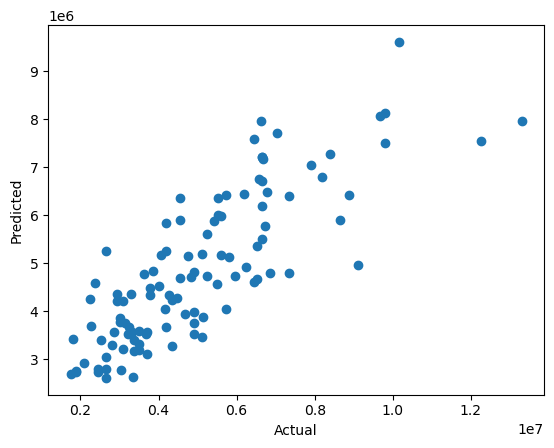

In [29]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

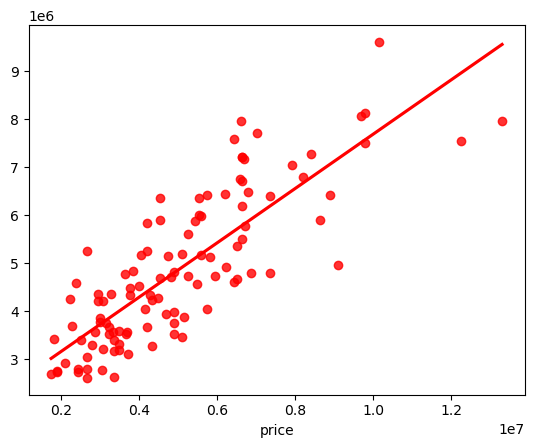

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
316,4060000,5.164654e+06,-1.104654e+06
77,6650000,7.224722e+06,-5.747223e+05
360,3710000,3.109863e+06,6.001368e+05
90,6440000,4.612075e+06,1.827925e+06
493,2800000,3.294646e+06,-4.946463e+05
...,...,...,...
15,9100000,4.973331e+06,4.126669e+06
357,3773000,4.336651e+06,-5.636509e+05
39,7910000,7.059063e+06,8.509373e+05
54,7350000,6.398941e+06,9.510591e+05


- We have to further do feature engineering to increase accuracy by checking colineearity etc... for now i will not be doing that